# Сomparison of estimators. Efficient estimators

## Task 1

Generate $M = 100 $ samples $X_1, ..., X_{1000}$ from a uniform distribution on the segment $[0, \theta]$ (take three arbitrary positive values of $\theta$). For each sample, $X_1, ..., X_n$ for all $n \leqslant 1000$ calculate the estimators of the parameter $\theta$ from the theoretical problem: $2\overline{X}$, $(n + 1) X_{(1)}$, $X_{(1)} + X_{(n)}$, $\frac{n+1}{n}X_{(n)}$. Calculate the quadratic loss function $(\hat{\theta} - \theta)^2$ for all the resulting estimators $ \hat{\theta}$ and average the samples for each fixed $n$. For each of the three values of $\theta$, plot the average loss functions depending on $n$.

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Declare global variables.

In [2]:
N = 1000
M = 100
thetas = [10, 50, 100]

Let's create a function that calculates the four estimators in the order they go in the task condition for each of the $M$ samples with the specified value $\theta$.

In [3]:
def find_estimators(theta):
    # matrix of estimators:
    # each row is a separate sample,
    # each column is a fixed sample size
    first_ests = np.zeros((M, N)) 
    second_ests = np.zeros((M, N))
    third_ests = np.zeros((M, N))
    fourth_ests = np.zeros((M, N))
    for i in range(M):
        sample = sps.uniform.rvs(loc=0, scale=theta, size=N)    # generate a sample
        first_ests[i] = 2 * np.cumsum(sample) / (np.arange(N) + 1)
        second_ests[i] = (np.arange(N) + 2) * np.minimum.accumulate(sample)
        third_ests[i] = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
        fourth_ests[i] = (np.arange(N) + 2) / (np.arange(N) + 1) * np.maximum.accumulate(sample)
    return first_ests, second_ests, third_ests, fourth_ests

The function that returns an array of values of the averaged loss function for each fixed $n$ is described below.

In [4]:
def find_loss(theta):
    first_ests, second_ests, third_ests, fourth_ests = find_estimators(theta)
        
    middle_first_loss = np.mean((first_ests - theta) ** 2, axis=0)
    middle_second_loss = np.mean((second_ests - theta) ** 2, axis=0)
    middle_third_loss = np.mean((third_ests - theta) ** 2, axis=0)
    middle_fourth_loss = np.mean((fourth_ests - theta) ** 2, axis=0)
    return [middle_first_loss, middle_second_loss, middle_third_loss, middle_fourth_loss]

For each value of the parameter $\theta$, we will plot the dependence of the loss function values on the sample size $n$.

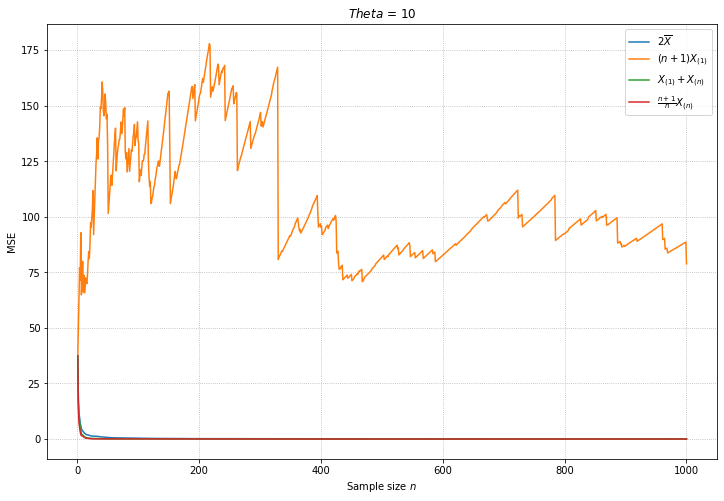

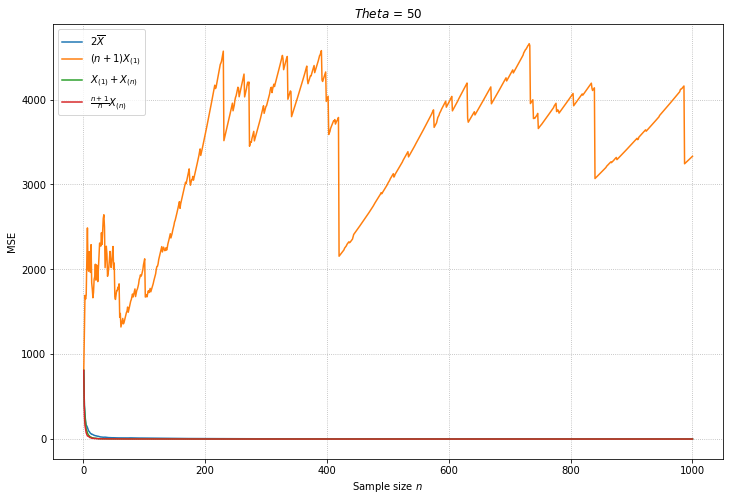

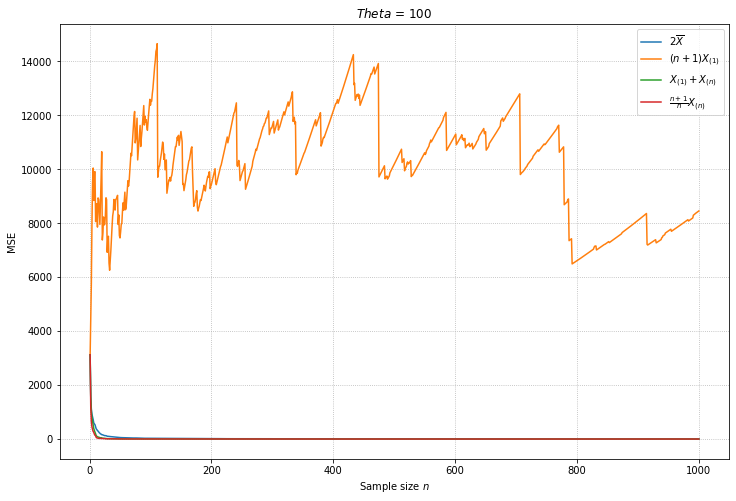

In [5]:
for theta in thetas:
    middle_loss = np.array(find_loss(theta)) # get an array of loss function values
    
    plt.figure(figsize = (12, 8))
    labels = ['$2\overline{X}$', '$(n + 1)X_{(1)}$', 
              '$X_{(1)} + X_{(n)}$', '$\\frac{n + 1}{n}X_{(n)}$']
    
    for i in range(len(middle_loss)): #len(middle_loss) = 4
        plt.plot(np.arange(1, N + 1), middle_loss[i], label=labels[i])
    
    plt.title("$Theta$ = {}".format(theta))
    plt.xlabel('Sample size $n$ ')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(ls=':')
    plt.show()

We see that the loss function for estimator $(n+1)X_{1}$ must be excluded from consideration as characterized by inappropriate behavior.

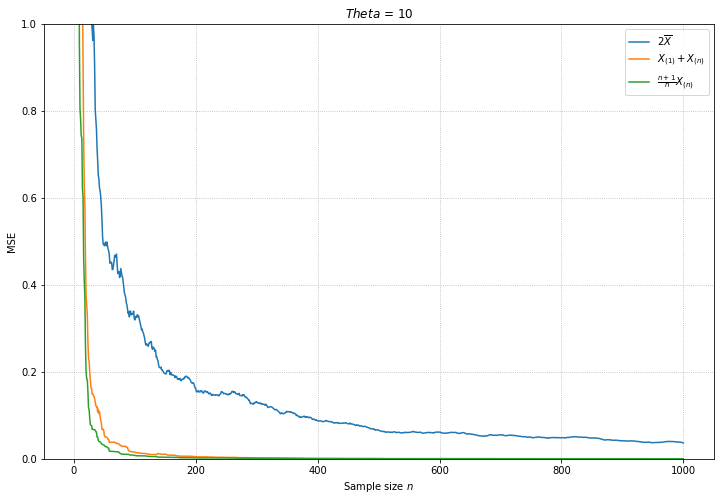

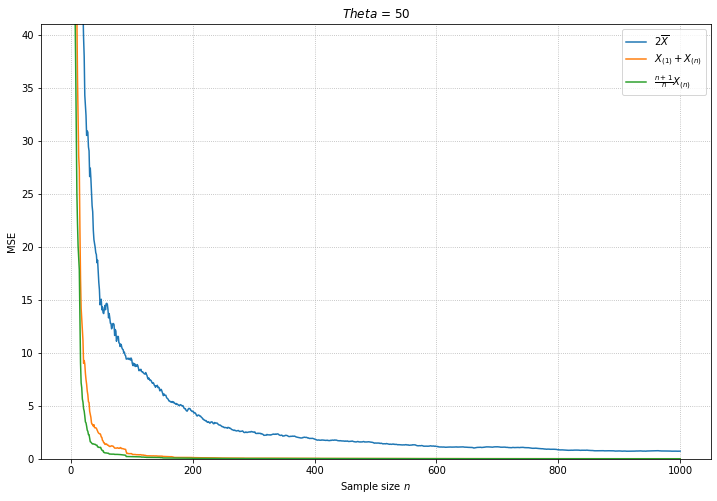

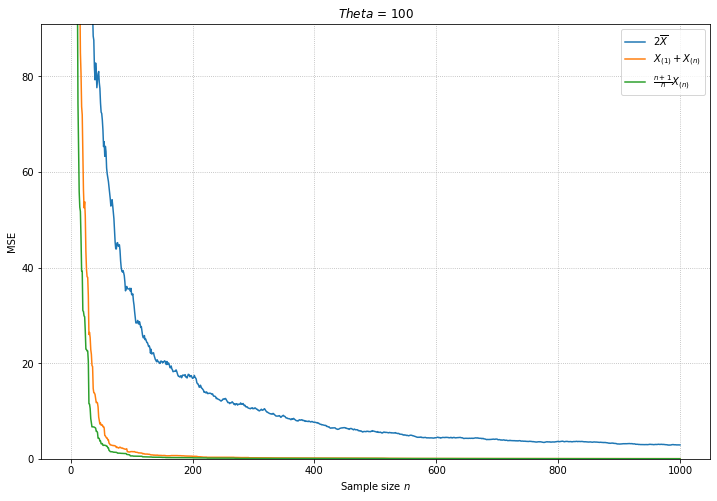

In [6]:
for theta in thetas:
    middle_loss = np.array(find_loss(theta)) # get an array of loss function values
    
    plt.figure(figsize = (12, 8))
    labels = ['$2\overline{X}$', '$(n + 1)X_{(1)}$', '$X_{(1)} + X_{(n)}$', '$\\frac{n + 1}{n}X_{(n)}$']
    
    for i in range(len(middle_loss)): #len(middle_loss) = 4
        if i != 1:
            plt.plot(np.arange(1, N + 1), middle_loss[i], label=labels[i])
    
    plt.title("$Theta$ = {}".format(theta))
    plt.xlabel('Sample size $n$ ')
    plt.ylabel('MSE')
    plt.ylim(0, theta - 9)
    plt.legend()
    plt.grid(ls=':')
    plt.show()

## Conclusion

In this problem, we compared the estimators in the standard-mean approach based on the graph readings. By definition, an estimator of $ \ hat{\theta_1}$ is better than $\hat{\theta_2}$ in the root-mean-square approach when:
$E_{\theta}(\hat{\theta_1} - \theta)^2 \leq E_{\theta}(\hat{\theta_2} - \theta)^2$, which means that the method of comparing estimators on graphs of their loss functions is correct, since the relative position of the lines on the graphs determines the sign of the necessary inequality.

The study found that the $\frac{n+1}{n}X_{(n)}$ estimator is better than any other of the proposed estimators. It is interesting to note that the estimator $X_{(1)} + X_ {(n)}$, which competed in the best approximation of the estimated parameter in the sense of the difference module with the estimator $\frac{n+1}{n}X_{(n)}$, is somewhat worse than it. A significant difference from these two estimators is found by the $2\overline{X}$ estimator, which is also consistent with the previous comparison of the $1$ Practical task ("The properties of the estimators").

These arguments, based on practical observation, lead to the idea that the comparison of estimators in the standard-mean approach is closely related to their consistency properties. The behavior of the not consistent estimator $(n + 1) X_{(1)}$ only confirms this.

## Task 2

Consider $X_1, ..., X_n \sim Bern(\theta)$. Using the grid of values $\theta \in [0, 1]$ with a step of $0.01$, plot the dependence of the lower estimator of the variance of an arbitrary unbiased estimator from the Rao-Kramer inequality on $\theta$. What conclusion can be drawn? For each value $\theta$ (for the same grid), generate a sample size $n=1000$ for the parameter $\theta$, calculate the effcient estimator $\theta$ and the bootstrap variance estimator (parametric bootstrap, the number of bootstrap samples is $500$) of this effecient estimator $\theta$. Draw a graph of the dependence of the received bootstrap estimators on $\theta$.

## Solution

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Declare global variables.

In [8]:
n = 1000
step = 0.01
thetas = np.arange(0, 1.001, step) # theta value grid

It follows from the Rao-Kramer inequality that the variance of the best estimator is $\frac{(\tau^ \prime (\theta))^2}{ni(\theta)}$. It is known from theory that the amount of information of one sample element from the Bernoulli distribution with the parameter $\theta$ is equal to $\frac{1}{\theta(1 - \theta)}$. This means that our variance estimate is $\frac{\theta(1 - \theta)}{n}$.

Calculate the values of the variance estimator on the grid for $\theta$ and write them to the array.

In [9]:
var = np.ones(len(thetas))
for i,  theta in enumerate(thetas):
    var[i] = theta * (1 - theta) / n

Let's plot the dependence of the variance estimator on $\theta$.

In [10]:
plt.figure(figsize = (12, 8))
plt.plot(thetas, var)

plt.title("Dependence of the lower variance estimator on $\\theta$")
plt.xlabel("$\\theta$", fontsize=15)
plt.ylabel("$\\frac{\\theta(1-\\theta)}{n}$", fontsize=15)
plt.grid(ls=':')
plt.show()

## Conclusion 1 

Based on the above graph, we can conclude that the variance estimator is maximal when $\theta$ is close to $1/2$. This means that with a small change in the parameter, the variance value will change slightly, since the fractions of ones and zeros will remain approximately the same. Since these fractions are approximately equal to each other, the variance reaches the maximum value here. Accordingly, when the number of ones or zeros in the sample increases, the variance value decreases sharply.

It is known from the theory that $\theta$ can be used as an effecient estimator of $\overline{X}$. Therefore, next, for each value of $\theta$, we generate a sample of size $n=1000$, calculate the effecient estimator of $\theta$ and a bootstrap estimator of the variance of this effecient estimator.

In [11]:
bootstrap_var = np.ones(len(thetas))
for i, theta in enumerate(thetas):
    sample = sps.bernoulli.rvs(theta, size=n) # generate a sample
    
    # generate bootstrap samples 
    # and calculate the variance estimator for effecient estimator
    estimators = np.zeros(500)
    for j in range(500): 
        estimators[j] = np.mean(sps.bernoulli.rvs(np.mean(sample), size=n))
    bootstrap_var[i] = np.var(estimators)

Let's plot the dependence of the received bootstrap estimators on $\theta$.

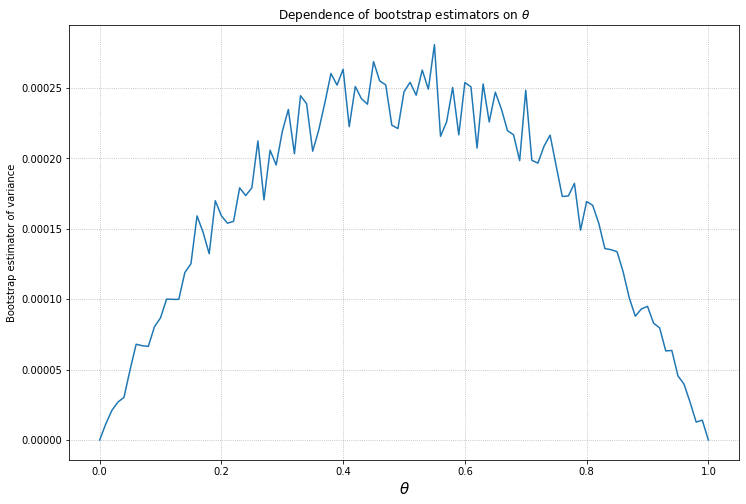

In [12]:
plt.figure(figsize = (12, 8))
plt.plot(thetas, bootstrap_var)

plt.title("Dependence of bootstrap estimators on $\\theta$")
plt.xlabel("$\\theta$", fontsize=15)
plt.ylabel("Bootstrap estimator of variance")
plt.grid(ls=':')
plt.show()

Compare the variance estimator obtained from the Rao-Kramer inequality and the bootstrap estimator.

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(thetas, var, label="Estimator on Rao-Kramer")
plt.plot(thetas, bootstrap_var, label="Bootstrap estimator")

plt.title("Comparison of the bootstrap estimator and the lower Rao-Kramer estimated")
plt.xlabel("$\\theta$", fontsize=15)
plt.ylabel("Variance estimators")
plt.legend()
plt.grid(ls=':')
plt.show()

## Conclusion 2

The above graph shows that the bootstrap estimator of variance is much more susceptible to changes in the sample parameter than the estimator obtained from the Rao-Kramer inequality. Informally, this can be explained by the fact that the estimator obtained from another estimator (in the case of bootstrap) is expected to evaluate the behavior of the original parameter or function from it worse. However, you can notice that the general behavior of the estimators is similar, namely, when the proportion of ones or zeros increases, both estimators decrease sharply.